In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [28]:
model = MLP()
model.load_state_dict(torch.load("RF_limb_MLP.pth", map_location=torch.device('cpu')))
model.to('cpu')


MLP(
  (model): Sequential(
    (0): Linear(in_features=70, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=70, bias=True)
  )
)

In [40]:
period = 140

In [29]:
data_in = np.load('data_in_for_predict.npy')
data_out = np.load('data_out_for_predict.npy')

# select y to train as an example
X_scaled = reshape_to_samples(data_in[:,1])
Y_scaled = reshape_to_samples(data_out[:,1])

In [35]:
predictions = np.array([predict(x, model) for x in X_scaled])

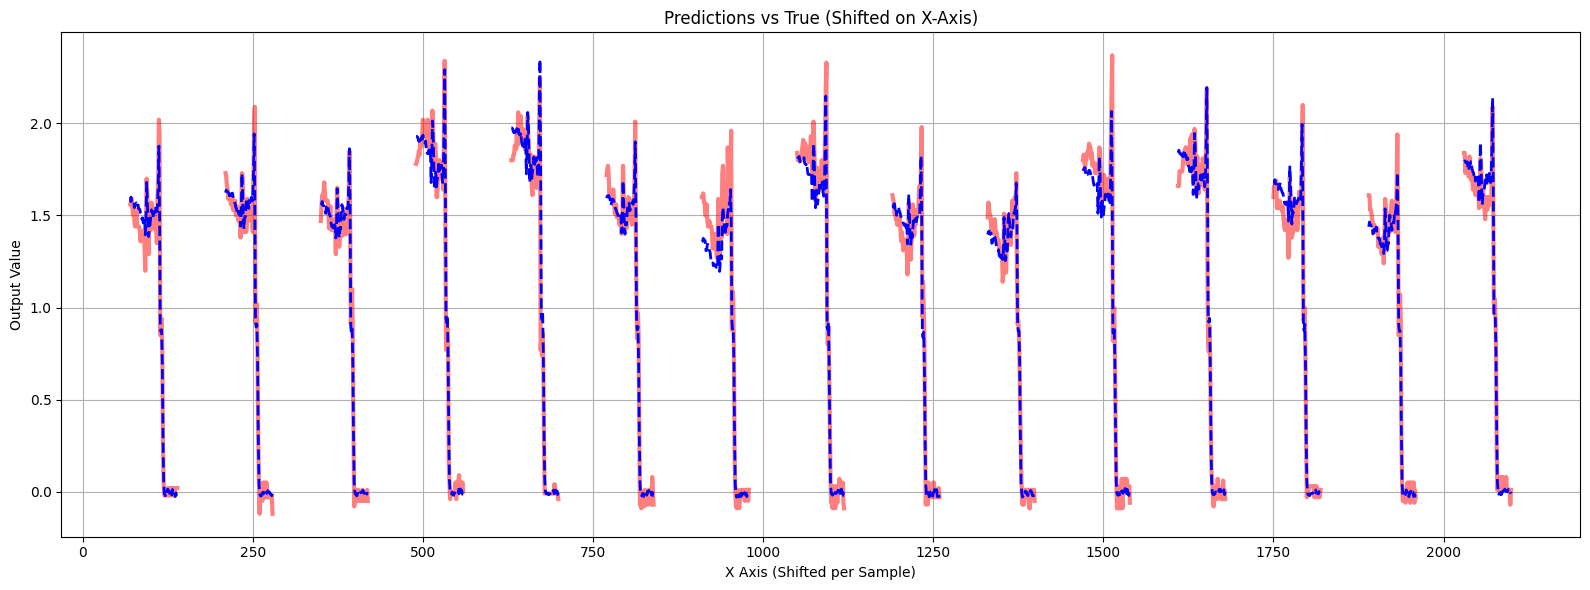

In [47]:
plt.figure(figsize=(16, 6))
sample_numbers = 15

for i in range(sample_numbers):
    x_start = 70 + i * 140
    x_end = x_start + 70
    x_range = np.arange(x_start, x_end)
    plt.plot(x_range, Y_scaled[i], label=f"Pred {i}", color='red',linewidth=3,alpha=0.5)
    plt.plot(x_range, predictions[i], label=f"Pred {i}", linestyle='--',color='blue',linewidth=2)
    

plt.title("Predictions vs True (Shifted on X-Axis)")
plt.xlabel("X Axis (Shifted per Sample)")
plt.ylabel("Output Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
class MLP(nn.Module):
    def __init__(self, input_size=70, hidden_size=32, output_size=70):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

In [13]:
def predict(input_array, model, scaler_X=None, scaler_Y=None):
    model.eval()
    x = input_array.reshape(1, -1)
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        y_tensor = model(x_tensor)
    y = y_tensor.cpu().numpy().squeeze()
   
    return y

In [9]:
def reshape_to_samples(data, sample_length=70):
    n = len(data)
    num_samples = n // sample_length  # Number of complete samples
    trimmed_data = data[:num_samples * sample_length]
    reshaped = trimmed_data.reshape((num_samples, sample_length))
    return reshaped